In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [58]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index
df_scaled.index = crypto_names

# Display the scaled DataFrame
df_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [10]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
   
    kmeans = KMeans(n_clusters=k, random_state=42)
   
    kmeans.fit(scaled_data)
    
    inertia_values.append(kmeans.inertia_)



In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)



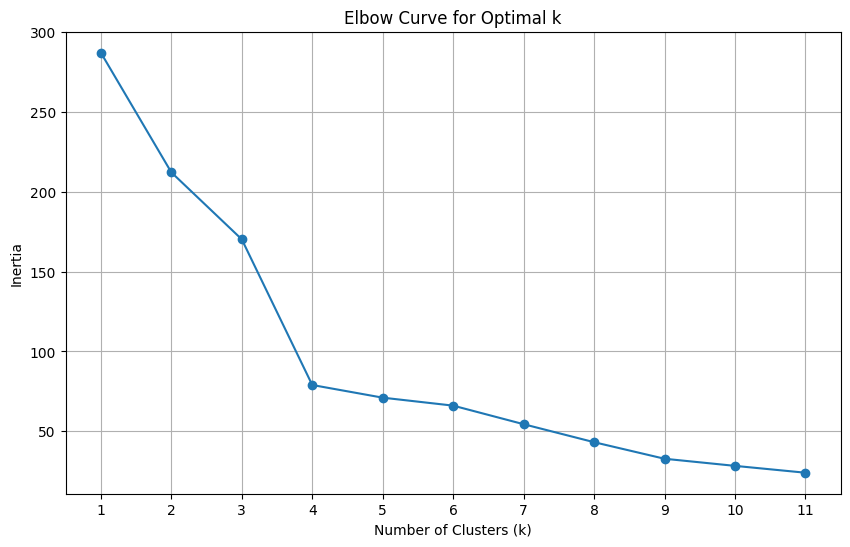

In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [14]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)



In [15]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(scaled_data)



KMeans(n_clusters=4, random_state=42)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(scaled_data)

# Print the resulting array of cluster values.
print(clusters)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [17]:
# Create a copy of the scaled DataFrame
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_market_data_scaled['coin_id'] = df_market_data.index



In [18]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled['cluster'] = clusters
df_market_data_scaled.set_index('coin_id', inplace=True)
# Display the copy of the scaled DataFrame
df_market_data_scaled.head(2)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0


In [19]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    colormap='Category10',
    hover_cols=['cluster']
)
hvplot.show(scatter_plot)


Launching server at http://localhost:50957


---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'], index=df_market_data.index)

# View the scaled PCA data
df_pca.head()



,Principal Component 1,Principal Component 2,Principal Component 3
coin_id,,,
bitcoin,1.585139,0.134394,0.545621
ethereum,1.322581,0.054494,1.115709
tether,-0.266335,-0.536409,-0.796946
ripple,-0.257225,-0.592013,-0.646529
bitcoin-cash,2.952250,0.422372,1.267894


In [23]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print(f'Explained Variance Ratios:\n{explained_variance}')

# Calculate the cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print(f'Cumulative Explained Variance:\n{cumulative_variance}')


Explained Variance Ratios:
[0.37005408 0.32322221 0.19115222]
Cumulative Explained Variance:
[0.37005408 0.69327629 0.88442851]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 88.44% of the variance in the data

In [24]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Copy the crypto names from the original scaled DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index
df_pca.index = crypto_names

# Display the scaled PCA DataFrame
df_pca.head(2)


,Principal Component 1,Principal Component 2,Principal Component 3
coin_id,,,
bitcoin,1.585139,0.134394,0.545621
ethereum,1.322581,0.054494,1.115709


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [25]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [48]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

df_market_data_pca = df_pca 

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_pca)
    inertia_values_pca.append(kmeans.inertia_)




In [49]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

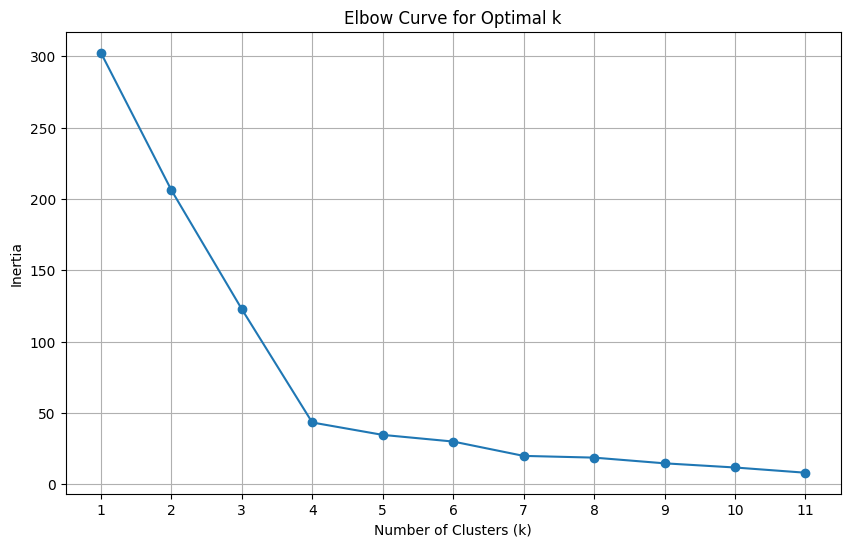

In [50]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [52]:
# Initialize the K-Means model using the best value for k
k_best = 4
kmeans = KMeans(n_clusters=k_best, random_state=42)



In [53]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_market_data_pca)

KMeans(n_clusters=4, random_state=42)

In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [55]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_copy = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_copy['cluster'] = clusters

# Display the copy of the scaled PCA DataFrame
print(df_market_data_pca_copy.head())


              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                    1.585139               0.134394   
ethereum                   1.322581               0.054494   
tether                    -0.266335              -0.536409   
ripple                    -0.257225              -0.592013   
bitcoin-cash               2.952250               0.422372   

              Principal Component 3  cluster  
coin_id                                       
bitcoin                    0.545621        0  
ethereum                   1.115709        0  
tether                    -0.796946        1  
ripple                    -0.646529        1  
bitcoin-cash               1.267894        0  


In [56]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data_pca_copy.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    c='cluster',
    colormap='Category10',
    hover_cols=['cluster']
)

# Display the scatter plot
hvplot.show(scatter_plot)


Launching server at http://localhost:53760


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

ValueError: x and y must have same first dimension, but have shapes (11,) and (22,)

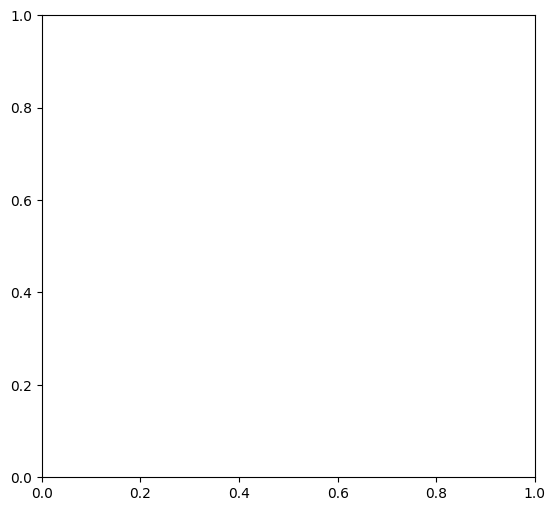

In [57]:
# Composite plot to contrast the Elbow curves

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Plot the Elbow curve for the original scaled data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', label='Original Data')
plt.title('Elbow Curve - Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

# Plot the Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values_pca, marker='o', color='orange', label='PCA Data')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [45]:
# Composite plot to contrast the clusters
# Create a StandardScaler instance and scale the original data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Fit K-Means on original scaled data
kmeans_original = KMeans(n_clusters=4, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

# Create a copy of the original scaled data DataFrame
df_original_clusters = df_market_data.copy()
df_original_clusters['cluster'] = clusters_original

# Fit K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_market_data_pca)

# Add cluster labels to PCA DataFrame
df_market_data_pca['cluster'] = clusters_pca

# Plot clusters for original scaled data
scatter_original = df_original_clusters.hvplot.scatter(
    x='price_change_percentage_24h', y='price_change_percentage_7d', c='cluster', colormap='Category10', hover_cols=['cluster']
)

# Plot clusters for PCA-transformed data
scatter_pca = df_market_data_pca.hvplot.scatter(
    x='Principal Component 1', y='Principal Component 2', c='cluster', colormap='Category10', hover_cols=['cluster']
)

# Display both plots in a composite layout
(scatter_original + scatter_pca).cols(2)


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)
   .Scatter.II :Scatter   [Principal Component 1]   (Principal Component 2,cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 